<a href="https://colab.research.google.com/github/kKawsarAlam/Classification-Algorithms/blob/main/KNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN Clasification**

**KNN Classification**

KNN (K-Nearest Neighbors) Classification is a supervised machine learning algorithm used to classify a data point based on the majority class of its nearest neighbors in the feature space.    

**How KNN Classification works:**

*   Choose a value of K (number of neighbors).
*   Calculate the distance between the new data point and all training points
(commonly Euclidean distance).  

*   Select the K nearest neighbors.  
*   Perform majority voting among those neighbors.

*   Assign the class with the highest votes.


In [104]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [105]:
# Loads a built-in handwritten digits dataset
digits = load_digits()

In [106]:
# Shows all attributes of the dataset object.
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [107]:
# 8x8 image (64 pixel)
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

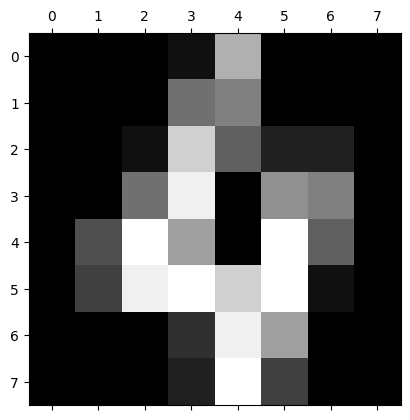

In [108]:
# plt.gray() → shows image in grayscale
# matshow() → visualizes the 8×8 digit
plt.gray()
plt.matshow(digits.images[4])

In [109]:
# Shows the true digit labels for the first 5 images.
digits.target[0:5]


array([0, 1, 2, 3, 4])

In [110]:
# Split Data into Train & Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [111]:
# Training and test size
print(len(x_train))
print(len(x_test))

1437
360


In [112]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [113]:
# Fit the model and Learns patterns between pixel values and digit labels.
model.fit(x_train, y_train)

KNeighborsClassifier()

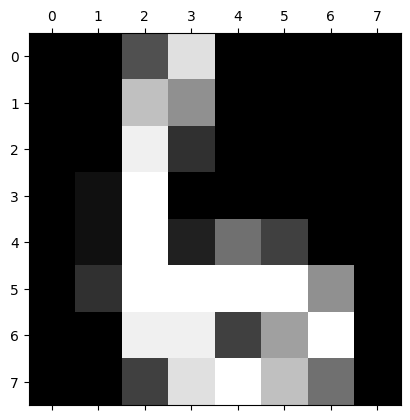

In [114]:
# Displays the digit image that we will predict.
plt.matshow(digits.images[67])

In [115]:
# Shows the Actual digit for comparison with model prediction.
print("Actual image:", int(digits.target[100]))

Actual image: 4


In [116]:
# Now our model predict truly the image is 6
print("Predicted image:", model.predict([digits.data[100]]))

Predicted image: [4]


In [117]:
# The actual image is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] at index 10-20 in dataset
print("Actual images:", digits.target[10:20])

Actual images: [0 1 2 3 4 5 6 7 8 9]


In [118]:
# Our model predicted correctly. predicted image is [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print("Predicted images:", model.predict(digits.data[10:20]))

Predicted images: [0 1 2 3 4 5 6 7 8 9]


In [119]:
# Model accuracy
print(f"Accuracy: {model.score(x_test, y_test):.2f}")

Accuracy: 0.99


In [121]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
conf_mat = confusion_matrix(y_test, y_predicted)
conf_mat

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 42]])

Text(0.5, 1.0, 'Confusion Matrix')

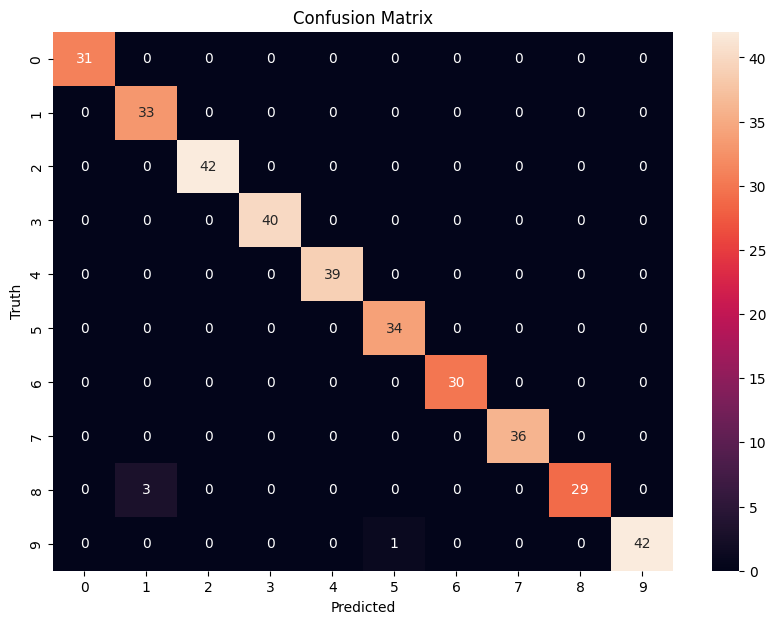

In [123]:
# Correlation
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

**KNN Regression**

K-Nearest Neighbors (KNN) regression is a non-parametric, instance-based machine learning algorithm that predicts continuous target values by averaging (mean) the values of the (k)-closest training samples in the feature space. It calculates distances (Euclidean or Manhattan) between a test point and training data to identify the nearest neighbors.  

For 2D,  
Euclidean Distance, d(x,y) = sqr((x2-x1)^2 + (y2-y1)^2)    
Manhattan Distance, d(x,y) = |x1 - x2| + |y1 - y2|

**Steps in KNN Regression:**  

Select (k): Choose the number of neighbors.  
Calculate Distance: Calculate the distance between the query point and all training samples.  
Find Neighbors: Sort the distances and select the \(k\) nearest data points.  
Aggregate: Calculate the average (mean or median) of the \(k\) neighbors' target values for the prediction.


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# Load the dataset
df = pd.read_csv('/content/weight-height.csv')

# Display basic info
print('📊 Dataset Shape:', df.shape)
print(f'\n📝 Total Records: {df.shape[0]:}')
print(f'📝 Total Features: {df.shape[1]}')

print('\n' + '-'*35)
print('\n🔍 First 5 Records:')
df.head()

📊 Dataset Shape: (8555, 3)

📝 Total Records: 8555
📝 Total Features: 3

-----------------------------------

🔍 First 5 Records:


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [62]:
# Check for missing values
missing = df.isnull().sum()
print('🔍 Missing Values Analysis:')
print('-'*30)
print(missing[missing > 0] if missing.sum() > 0 else '✅ No missing values found!')

# Check for duplicates
duplicates = df.duplicated().sum()
print(f'\n🔄 Duplicate Records: {duplicates}')

🔍 Missing Values Analysis:
------------------------------
✅ No missing values found!

🔄 Duplicate Records: 0


<Axes: xlabel='Weight', ylabel='Count'>

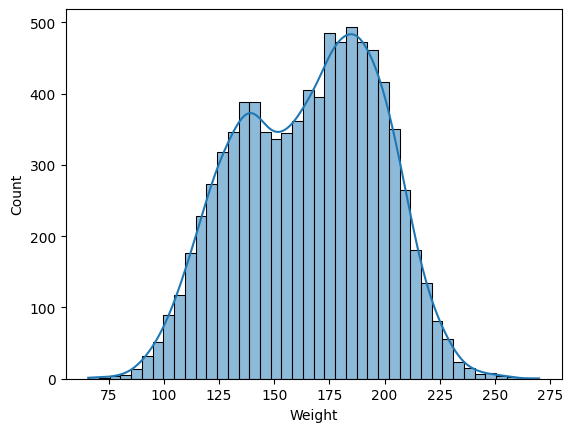

In [63]:
sns.histplot(df['Weight'], kde=True)

In [64]:
# mean value of weight
mean_value = df['Weight'].mean()
mean_value

np.float64(165.6327353266768)

In [65]:
# standard deviation value of weight
std_value = df['Weight'].std()
std_value

32.04392221721549

In [66]:
# Positive std-3
std_3 = mean_value + (2.5 * std_value)
std_3

np.float64(245.74254086971553)

In [67]:
# Negative std_3
neg_std_3 = mean_value - (2.5 * std_value)
neg_std_3

np.float64(85.52292978363808)

In [68]:
# Check outlier from positive std_3
df[df['Weight'] > std_3]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [69]:
# Check outlier from negative std_3
df[df['Weight'] < neg_std_3]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5026,Female,56.547975,84.872124
5214,Female,56.785434,83.993077
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7324,Female,56.810317,84.170695


In [70]:
#
marge = df[(df['Weight'] > std_3) | (df['Weight'] < neg_std_3)]

In [71]:
marge.shape

(27, 3)

In [72]:
remove_outlires = df[(df['Weight'] < std_3) & (df['Weight'] > neg_std_3)]

In [73]:
remove_outlires.shape

(8528, 3)

<Axes: xlabel='Weight', ylabel='Count'>

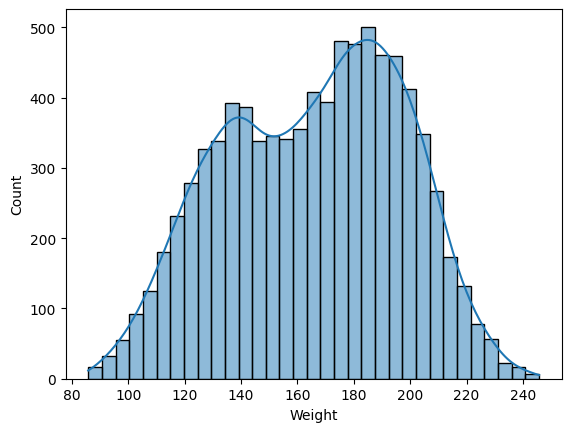

In [74]:
sns.histplot(remove_outlires['Weight'], kde=True)

In [76]:
# One-Hot-Encoding
dummies = pd.get_dummies(remove_outlires['Gender'], drop_first=True).astype(int)
dummies.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [77]:
new_df = remove_outlires.drop('Gender', axis=1)
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [78]:
# Concat new_df and dummies columns
df = pd.concat([new_df, dummies], axis=1)
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [80]:
# After removing outlier now all data
df.shape

(8528, 3)

In [81]:
x = df.drop('Weight', axis=1)
x.head()

,Height,Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1


In [82]:
y = df['Weight']
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [83]:
# Spliting train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [85]:
print("Training Data:",X_train.shape)

Training Data: (5969, 2)


In [87]:
print("Testing Data:",X_test.shape)

Testing Data: (2559, 2)


In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=100)

In [89]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [90]:
pred = knn.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
# MSE value
mean_squared_error(y_test, pred)

100.71783048546757

In [99]:
# Model score
print(f"Accuracy: {r2_score(y_test, pred):.2f}")

Accuracy: 0.90
